In [1]:
#Exploratory Data Analysis (EDA):
#1-Data Overview:

#Display basic information about the dataset: number of rows, columns, data types, and missing values.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load dataset
data = pd.read_excel("C:/Users/rhizc/OneDrive/Desktop/PROJECT 1/PRODATA.xlsx")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958499 entries, 0 to 958498
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trans_id          958499 non-null  object        
 1   trans_type        958499 non-null  object        
 2   trans_date        958499 non-null  datetime64[ns]
 3   prop_type         958499 non-null  object        
 4   prop_stype        809092 non-null  object        
 5   prop_usage        958499 non-null  object        
 6   location_id       958499 non-null  int64         
 7   location_name     958499 non-null  object        
 8   capacity          794423 non-null  object        
 9   prop_area(sq/m)   958499 non-null  float64       
 10  sale_price(sq/m)  958499 non-null  float64       
 11  prop_value        958499 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 87.8+ MB
None


In [2]:
#2-Descriptive Statistics:
#Calculate descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset.

# Descriptive statistics for numeric columns
data.describe()


,location_id,prop_area(sq/m),sale_price(sq/m),prop_value
count,958499.000000,9.584990e+05,9.584990e+05,9.584990e+05
mean,409.817265,4.095231e+02,1.380727e+04,2.916667e+06
std,68.857733,1.227763e+04,1.077461e+05,2.566981e+07
min,230.000000,5.000000e-02,0.000000e+00,1.000000e+00
25%,350.000000,6.942000e+01,6.761595e+03,6.730000e+05
50%,412.000000,1.112000e+02,9.942530e+03,1.221204e+06
75%,462.000000,2.041100e+02,1.515152e+04,2.205000e+06
max,531.000000,5.579949e+06,2.181199e+07,8.100000e+09


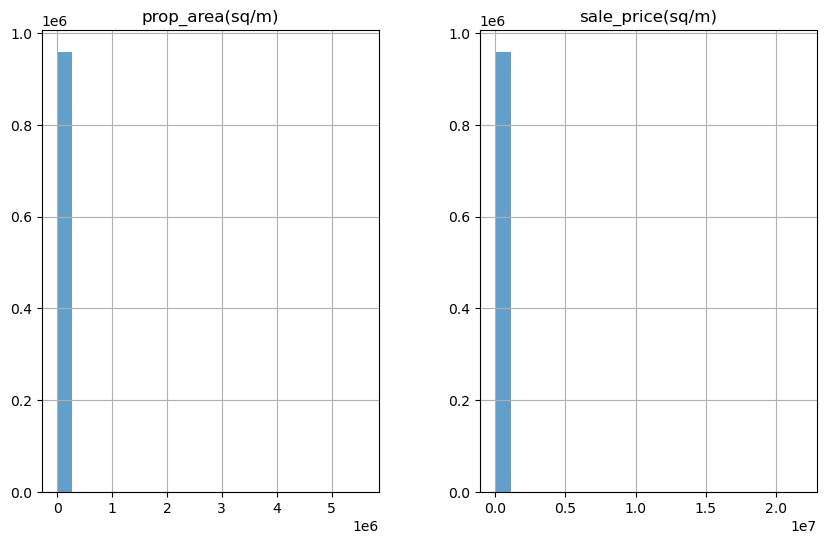

In [3]:
#3-Distribution of Numeric Variables:
#Create histograms to visualize the distribution of numeric variables: "prop_area(sq/m)" and "sale_price(sq/m)".

data[['prop_area(sq/m)', 'sale_price(sq/m)']].hist(figsize=(10, 6), bins=20, alpha=0.7)
plt.show()


In [13]:
#4-Correlation Analysis:
#Explore correlations between numerical columns.

correlation_matrix = data[['sale_price(sq/m)', 'prop_value']].corr()
print(correlation_matrix)

correlation_matrix1 = data[['prop_area(sq/m)', 'sale_price(sq/m)']].corr()
print(correlation_matrix1)

                  sale_price(sq/m)  prop_value
sale_price(sq/m)          1.000000    0.049397
prop_value                0.049397    1.000000
                  prop_area(sq/m)  sale_price(sq/m)
prop_area(sq/m)           1.00000          -0.00207
sale_price(sq/m)         -0.00207           1.00000


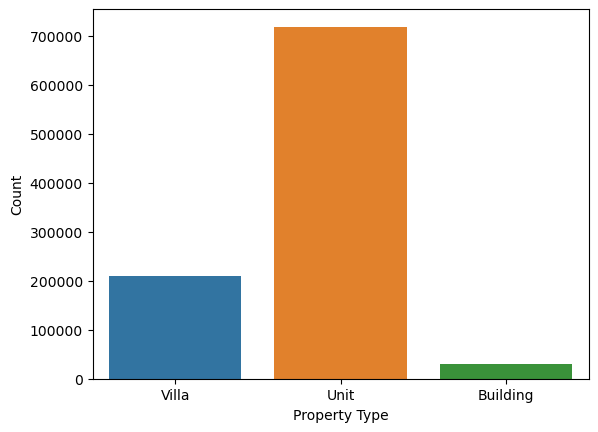

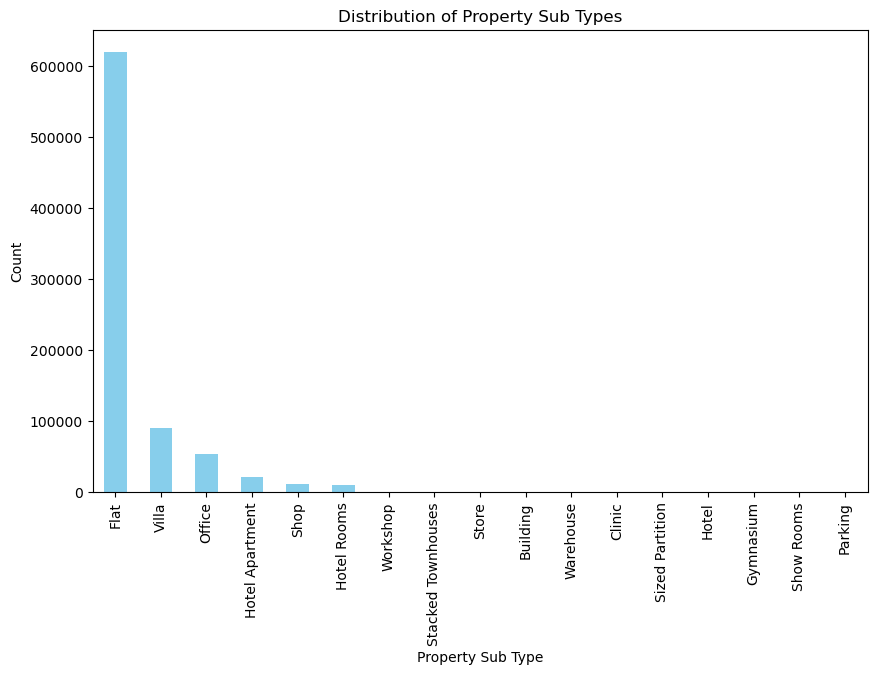

In [12]:
#5-Categorical Variables analysis:

import seaborn as sns

#Explore the distribution of categorical variables; property types and sub-types using bar charts.
sns.countplot(x='prop_type', data=data)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

data['prop_stype'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribution of Property Sub Types')
plt.xlabel('Property Sub Type')
plt.ylabel('Count')
plt.show()

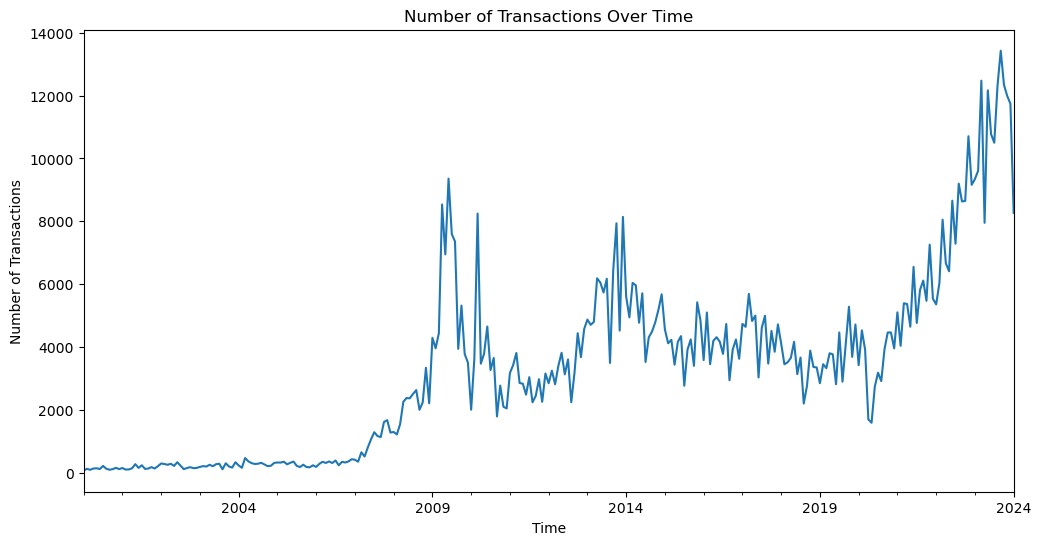

In [7]:
#6-Temporal Analysis:

#analyze trends over time using the "trans_date" variable with line chart.
data['trans_date'] = pd.to_datetime(data['trans_date'])
data.set_index('trans_date', inplace=True)

# Resample data by month and plot
data.resample('M').size().plot(figsize=(12, 6))
plt.title('Number of Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()


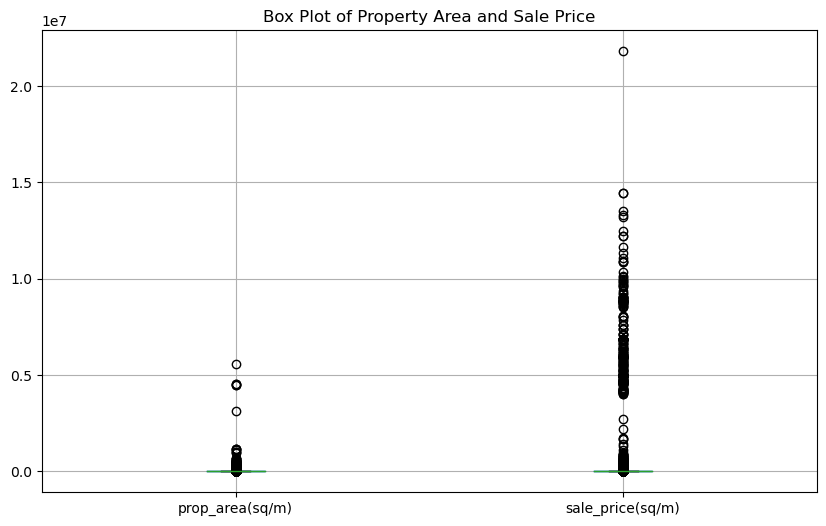

In [8]:
#7-Outlier Detection:
#Identify and visualize outliers in numeric variables using box plot.

data[['prop_area(sq/m)', 'sale_price(sq/m)']].boxplot(figsize=(10, 6))
plt.title('Box Plot of Property Area and Sale Price')
plt.show()
